In [1]:
print("TÔI YÊU CHỊ MI MEO !!!")

TÔI YÊU CHỊ MI MEO !!!


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge , LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset 
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
data.shape

(5000, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
data = data.drop('Address' , axis=1)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


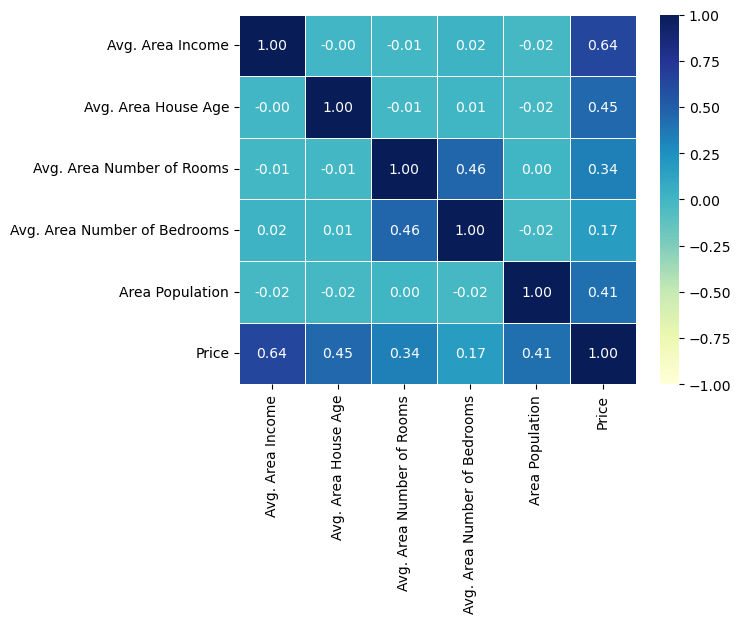

In [4]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,
           fmt='.2f' , 
           vmin=-1 , vmax=1 , 
           linecolor='white' , linewidths=0.7);

In [61]:
X = data.drop('Price',axis=1)
y = data['Price']
X_validation = X.iloc[4995: , :]
y_validation = y.iloc[4995:]
X_Test = X.iloc[:4995,:]
y_Test = y.iloc[:4995]
X_train , X_test , y_train , y_test = train_test_split(X_Test,y_Test,test_size=0.2 , random_state=42)
X_validation 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156
4999,65510.581804,5.992305,6.792336,4.07,46501.283803


In [59]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

In [66]:
lr = LinearRegression()
lr.fit(X_train_scaled , y_train)
y_pred = lr.predict(X_test_scaled)

In [78]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(mse)
print(r2)

10328114634.267986
0.9149029772354509


In [68]:
rd = Ridge()
rd.fit(X_train , y_train)
y_pred_1 = rd.predict(X_test)

mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test,y_pred_1)

print(mse)
print(r2)

10328285225.83825
0.9149015716706163


In [69]:
ls = Lasso()
ls.fit(X_train , y_train)
y_pred_2 = ls.predict(X_test)

mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test,y_pred_2)

print(mse)
print(r2)

10328116176.282866
0.91490296453024


In [73]:
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X_train_scaled)
X_test_poly = pr.fit_transform(X_test_scaled)
rd = Ridge()
rd.fit(X_poly , y_train)

y_Pred = rd.predict(X_test_poly)

mse = mean_squared_error(y_test, y_Pred)
r2 = r2_score(y_test,y_Pred)

print(mse)
print(r2)

10461145432.833931
0.9138068890049436


In [74]:
y_pred_validation = lr.predict(X_validation_scaled)

In [75]:
y_pred_validation

array([1057495.53822463, 1402198.96991572, 1018557.20521075,
       1263761.64880843, 1301688.92667751])

In [76]:
y_validation

4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, dtype: float64

In [77]:
y_validation-y_pred_validation

4995     2698.247660
4996    80418.758706
4997    12172.377942
4998   -65104.776401
4999    -2738.446411
Name: Price, dtype: float64